# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

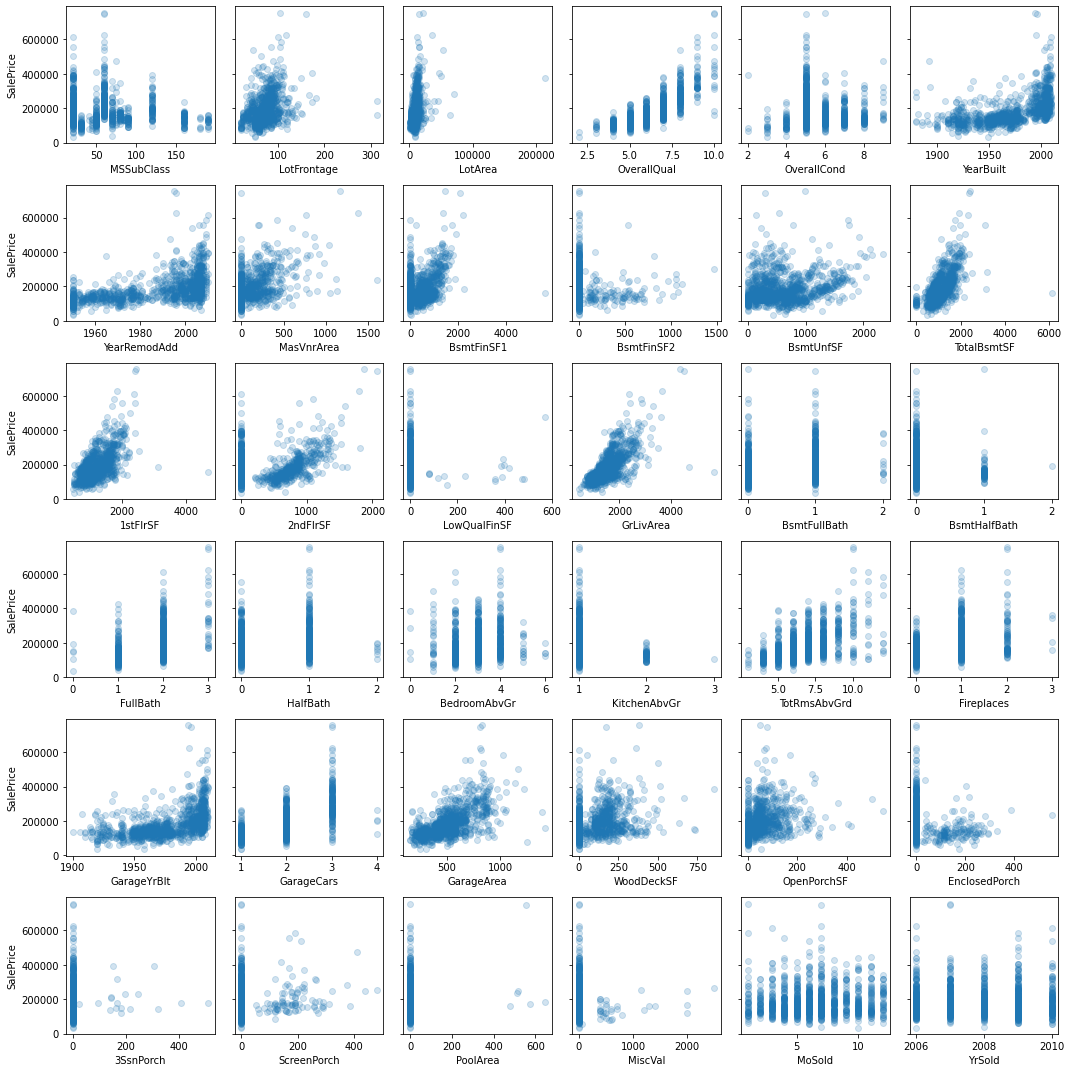

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

# Your written answer here

**Features resembling the first graph (highly skewed, outliers spread widely across x and y):**

LotArea: The distribution is heavily skewed, with a small number of very large values.

BsmtFinSF1: Some extreme values suggest a possible right skew.

**Features resembling the second graph (moderate positive correlation, linear trend but with increasing variance):**

TotalSF (Total Basement + 1st Floor + 2nd Floor area): Shows a clear positive correlation with SalePrice, but with more spread at higher values.

GrLivArea: Larger values show greater variance, making it a candidate for log transformation.

**Features resembling the third graph (exponential growth curve, very small values at the beginning but rapid increase later):**

SalePrice (our target variable): Shows characteristics of exponential growth, making it a strong candidate for log transformation.

GarageArea: Values start small but increase sharply at higher levels.



### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

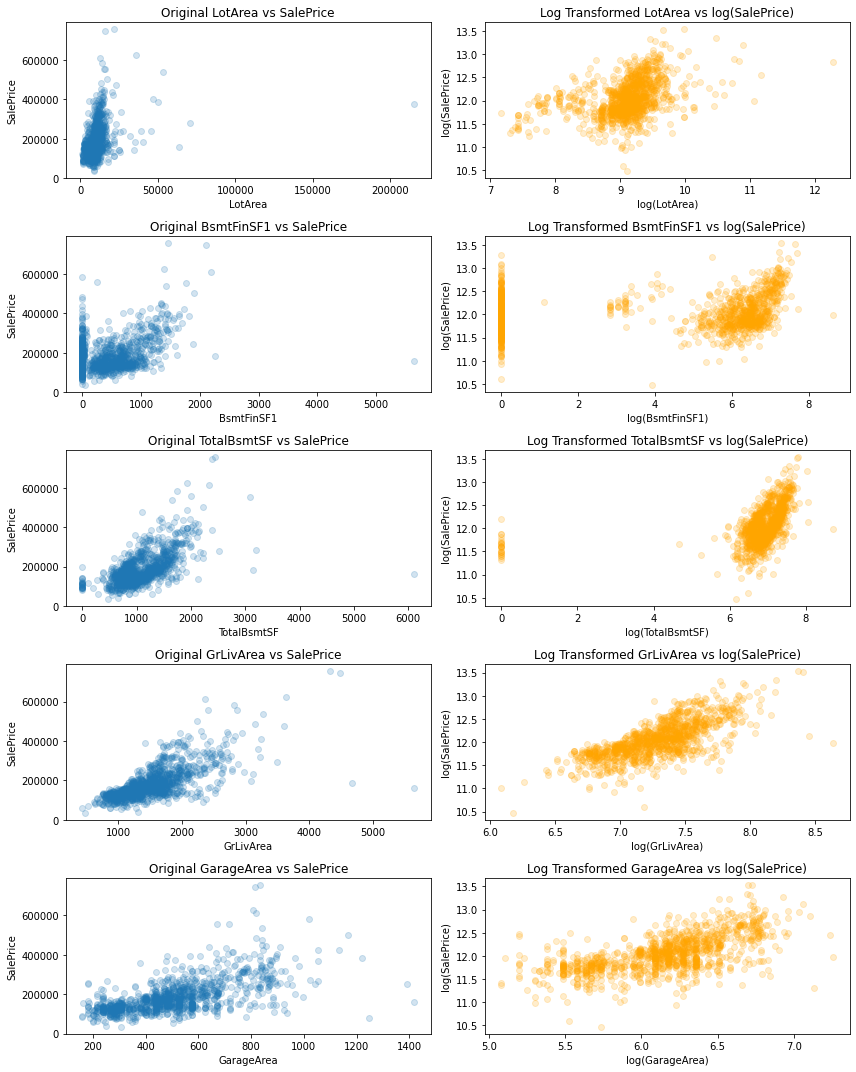

In [3]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Identified features for log transformation
features_to_log_transform = ["LotArea", "BsmtFinSF1", "TotalBsmtSF", "GrLivArea", "GarageArea"]
log_y = np.log(y)  # Log transform target variable

# Create plots for original vs log-transformed features
fig, axes = plt.subplots(nrows=len(features_to_log_transform), ncols=2, figsize=(12, 15))

for i, feature in enumerate(features_to_log_transform):
    # Log transform the feature
    log_X = np.log(X[feature] + 1)  # Adding 1 to avoid log(0) issues

    # Original scatter plot
    axes[i][0].scatter(X[feature], y, alpha=0.2)
    axes[i][0].set_xlabel(feature)
    axes[i][0].set_ylabel("SalePrice")
    axes[i][0].set_title(f"Original {feature} vs SalePrice")

    # Log-transformed scatter plot
    axes[i][1].scatter(log_X, log_y, alpha=0.2, color="orange")
    axes[i][1].set_xlabel(f"log({feature})")
    axes[i][1].set_ylabel("log(SalePrice)")
    axes[i][1].set_title(f"Log Transformed {feature} vs log(SalePrice)")

fig.tight_layout()
plt.show()


Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [4]:
# Your code here - prepare data for modeling

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


# ---- Prepare Data for Modeling ----
# Select three features for log transformation
selected_features = ["GrLivArea", "GarageArea", "TotalBsmtSF"]


# Apply log transformation to selected features
X_log = np.log(X[selected_features] + 1)  # Adding 1 to avoid log(0) issues
y_log = np.log(y)  # Log transform the target variable


# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)



### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [5]:
# Your code here - build a model
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()


# Make predictions on test data
y_pred_sm = ols_model.predict(X_test_sm)


# Evaluate model performance
r2_sm = r2_score(y_test, y_pred_sm)
rmse_sm = np.sqrt(mean_squared_error(y_test, y_pred_sm))


# ---- Display Model Summary ----
print(ols_model.summary())


# Print evaluation metrics
print(f"\nR² Score: {r2_sm:.3f}")
print(f"RMSE: {rmse_sm:.3f}")



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     569.6
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          1.01e-206
Time:                        19:46:58   Log-Likelihood:                 28.207
No. Observations:                 896   AIC:                            -48.41
Df Residuals:                     892   BIC:                            -29.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7562      0.181     26.242      

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

# Your code here - evaluate the model

**Model Performance**

The R² score for our model is 0.678, meaning that 67.8% of the variation in SalePrice can be explained by the three selected features. This indicates a moderate to strong relationship between the log-transformed independent variables and the log-transformed target.

The RMSE (Root Mean Squared Error) is 0.214, which suggests that the model's average prediction error in log-transformed SalePrice is relatively low. This means the model is doing a good job of predicting SalePrice on a log scale.

**Interpreting the Coefficients**

The estimated regression equation for our model is:

**log⁡(SalePrice)=4.756+0.652log⁡(GrLivArea)+0.336log⁡(GarageArea)+0.0703log⁡(TotalBsmtSF)**

Each coefficient represents the percentage change in SalePrice for a 1% increase in the corresponding feature, assuming all other features remain constant.

**GrLivArea (Above Ground Living Area)** has the highest impact on SalePrice. A 1% increase in GrLivArea results in approximately a 0.652% increase in SalePrice. This makes sense because larger living spaces generally contribute significantly to home value.

**GarageArea** also has a notable effect. A 1% increase in GarageArea leads to a 0.336% increase in SalePrice. Homes with larger garage spaces are likely to be valued higher.


**TotalBsmtSF (Total Basement Square Footage)** has the smallest effect among the three, but it is still statistically significant. A 1% increase in TotalBsmtSF leads to a 0.0703% increase in SalePrice. This suggests that while a larger basement can add value, it does not have as strong an impact as the above-ground living space.


**My key understanding**

The model indicates that the most important predictor of SalePrice is GrLivArea, followed by GarageArea and TotalBsmtSF. All three variables have a positive relationship with SalePrice, meaning that as they increase, the price of a home also increases. The log transformation has helped create a more linear relationship, making the model more interpretable.

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.